In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

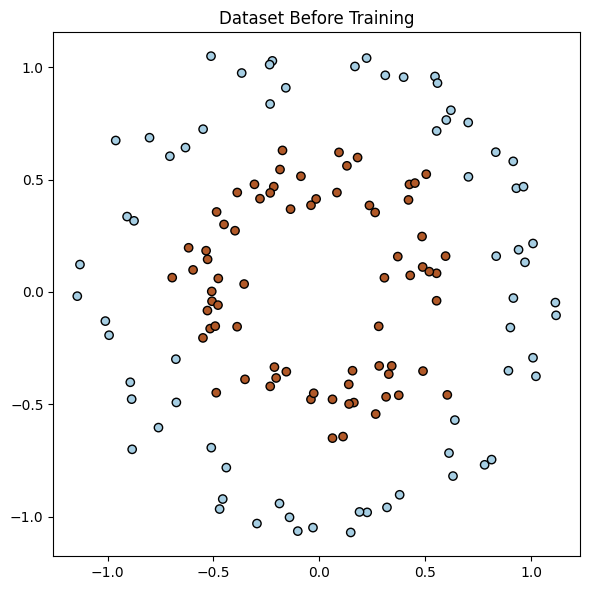

Accuracy (Linear Kernel): 0.47
Accuracy (Polynomial Kernel): 0.58
Accuracy (RBF Kernel): 0.98


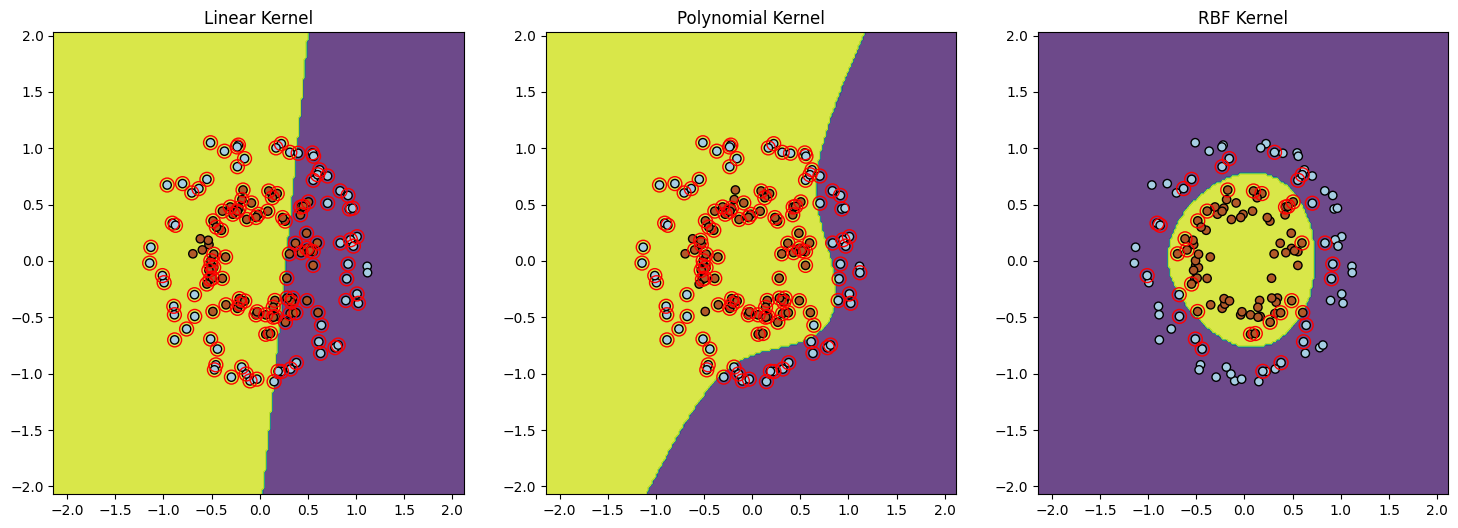

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Generate synthetic non-linear data (circles dataset)
X, y = make_circles(n_samples=200, factor=0.5, noise=0.1, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot dataset
def plot_dataset(X, y, title, ax):
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')
    ax.set_title(title)
    return scatter

# Plot the dataset before training
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_dataset(X_train, y_train, 'Dataset Before Training', ax)
plt.tight_layout()
plt.show()

# Initialize SVM models with different kernels
svm_linear = SVC(kernel='linear', C=1)
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_rbf = SVC(kernel='rbf', C=1)

# Fit the models
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Confusion Matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_poly = confusion_matrix(y_test, y_pred_poly)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

# Function to plot decision boundary and support vectors
def plot_decision_boundary(model, X, y, title, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], facecolors='none', edgecolors='r', s=100, label='Support Vectors')
    ax.set_title(title)
    return scatter

# Create subplots for decision boundaries and support vectors
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot decision boundaries and support vectors
plot_decision_boundary(svm_linear, X_train, y_train, "Linear Kernel", axes[0])
plot_decision_boundary(svm_poly, X_train, y_train, "Polynomial Kernel", axes[1])
plot_decision_boundary(svm_rbf, X_train, y_train, "RBF Kernel", axes[2])


# Print accuracies
print(f"Accuracy (Linear Kernel): {accuracy_linear:.2f}")
print(f"Accuracy (Polynomial Kernel): {accuracy_poly:.2f}")
print(f"Accuracy (RBF Kernel): {accuracy_rbf:.2f}")


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Accuracy without regularization: 0.8767
Accuracy with L1 regularization: 0.8800
Accuracy with L2 regularization: 0.8767


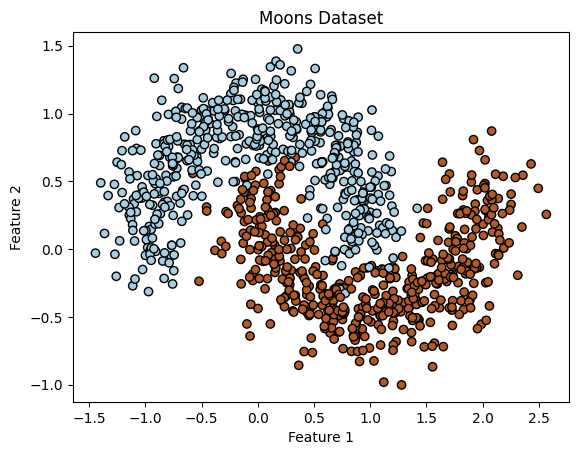

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Step 2: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train a Logistic Regression model without regularization
model_no_reg = LogisticRegression(penalty='none', solver='lbfgs', max_iter=1000)
model_no_reg.fit(X_train, y_train)

# Step 5: Evaluate accuracy without regularization
y_pred_no_reg = model_no_reg.predict(X_test)
accuracy_no_reg = accuracy_score(y_test, y_pred_no_reg)

# Step 6: Train a Logistic Regression model with L1 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_l1.fit(X_train, y_train)

# Step 7: Evaluate accuracy with L1 regularization
y_pred_l1 = model_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)

# Step 8: Train a Logistic Regression model with L2 regularization
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
model_l2.fit(X_train, y_train)

# Step 9: Evaluate accuracy with L2 regularization
y_pred_l2 = model_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

# Step 10: Print the accuracies
print(f"Accuracy without regularization: {accuracy_no_reg:.4f}")
print(f"Accuracy with L1 regularization: {accuracy_l1:.4f}")
print(f"Accuracy with L2 regularization: {accuracy_l2:.4f}")

# Step 11: Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
